In [11]:
import numpy as np
import scipy.integrate as sc
import matplotlib.pyplot as plt
import matplotlib.colors as cl
import xarray as xr

In [12]:
# N2 = 1e-5
# theta = 1*1.8113*np.pi/180
# f = 1e-4
# S2 = N2*np.tan(theta)**2/f**2
# beta = (1+S2)**(0.5)
# fstar = f*np.cos(theta)*beta
# delta = 0.5
# gm =  (np.cos(theta)*(1+(1-delta)*S2))**(-1) 
# lmbd = N2*np.tan(theta)*gm/f
# n = f/lmbd
# Ri = N2*(np.cos(theta)-gm)/lmbd**2
# alpha = N2*(np.cos(theta)-gm)*np.tan(theta)/(f*lmbd)

In [14]:
def m_t(t, m, fstar, delta, lmbd):
    phi = np.pi/2
    return m + delta*lmbd/(fstar)*np.sin(t+phi)

In [15]:
def PSI_system(v,t,m,theta,gm,S2,delta,lmbd):
    psi, D = v
    fstar = f*np.cos(theta)*(1+S2)**(0.5)
    A0 = (np.tan(theta)**2-S2)/(np.tan(theta)*(1+S2))*(m-np.tan(theta)*(np.tan(theta)**2-S2)**(-1)*((S2/(np.tan(theta)**2))*(1-gm*np.cos(theta)**(-4))+np.tan(theta)**2))
    A1 = m+(S2-np.tan(theta)**2)*(np.tan(theta)*(1+S2))**(-1)
    dpsidt = (A0-A1*m_t(t,m,fstar,delta,lmbd))*D
    dDdt = (1+m_t(t,m,fstar,delta,lmbd)**2)**(-1)*psi
    return [dpsidt, dDdt]

In [16]:
def delta_gamma(gml,gmu):
    if (gmu-gml) <= 1e-3:
        return 0.001
    elif (gmu-gml) <= 16e-3:
        return 0.002
    elif (gmu-gml) <= 3e-2:
        return 0.005
    elif (gmu-gml) <= 15e-2:
        return 0.025
    else:
        return 0.01

In [17]:
0.16671226866884775/1e-2

16.671226866884776

In [ ]:
max_grs = []
max_ms = []
max_frs = []
N2 = 1e-5
# theta = 1.8113*np.pi/180*np.array([0.1,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2])
theta_list = [1.8113*np.pi/180] #*np.arange(0.1,2.1,0.5) #*np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2])
f = 1e-4

tau = 2*np.pi
dt = 50
t = np.linspace(0, tau+1/dt, dt)
# gm = np.linspace(0.01, 1.01, 50)
m = np.linspace(-50, 50, 160)
delta_list = np.linspace(0,1.05,26)
for theta in theta_list:
    max_grs_sub2 = []
    max_ms_sub2 = []
    max_frs_sub2 = []
    for i in delta_list:
        # print(i)
        max_grs_sub = []
        max_ms_sub = []
        max_frs_sub = []
        S2 = N2*np.tan(theta)**2/f**2
        beta = (1+S2)**(0.5)
        fstar = f*np.cos(theta)*beta
        gml = (1+(1-2)*S2)/(1+S2) #max(0.05,(3-S2)*(np.cos(theta)*(3*(1+S2)))**(-1))
        gmu = (1+(1-4/5)*S2)/(1+S2) #(np.cos(theta)*(1+S2))**(-1)
        # gm = ((np.cos(i)*(1+S2))**(-1)+(3-S2)*(np.cos(i)*(3*(1+S2)))**(-1))/2
        # dgm = delta_gamma(gml,gmu)
        # gm = np.arange(gml,gmu,dgm)
        gm_list = np.linspace(gml,gmu,26)
        for gm in gm_list:
            # print(j)
            lmbd = N2*np.tan(theta)*gm/f
            n = f/lmbd
            Ri = N2*(np.cos(theta)-gm)/lmbd**2
            alpha = N2*(np.cos(theta)-gm)*np.tan(theta)/(f*lmbd)
            frequencies = []
            growth_rates = []
            for q in m:
                sol1 = sc.odeint(PSI_system, [1, 0], t, args=(q, theta, gm, S2, i, lmbd))
            #     print(sol1[-1,:])
                sol2 = sc.odeint(PSI_system, [0, 1], t, args=(q, theta, gm, S2, i,lmbd)) 
            #     print(sol2[-1,:])
                M = np.array([[sol1[-1, 0], sol1[-1, 1]], [sol2[-1, 0], sol2[-1, 1]]])
            #     print(M)
                eigs = np.log(np.linalg.eig(M)[0]+0*1j)/(tau)
            #     print(np.linalg.eig(M)[1][:,0])
            #     print(eigs)
                growth_rates.append(eigs.real)
                frequencies.append(eigs.imag)
            frequencies = np.array(frequencies)
            growth_rates = np.array(growth_rates)
            gr = growth_rates[np.argmax(np.abs(growth_rates[:,0])),:]
            fr = frequencies[np.argmax(np.abs(growth_rates[:,0])),:]
            m_max = m[np.argmax(np.abs(growth_rates[:,0]))]
            max_grs_sub.append(gr)
            max_ms_sub.append(m_max)
            max_frs_sub.append(fr)
        max_grs_sub2.append(max_grs_sub)
        max_ms_sub2.append(max_ms_sub)
        max_frs_sub2.append(max_frs_sub)
    max_grs.append(max_grs_sub2)
    max_ms.append(max_ms_sub2)
    max_frs.append(max_frs_sub2)
max_gr = np.array(max_grs)
max_ms = np.array(max_ms)
max_fr = np.array(max_frs)

In [ ]:
gms = []
for theta in theta_list:
    gms_2 = []
    for i in delta_list:
        S2 = N2*np.tan(theta)**2/f**2
        gml = (1+(1-2)*S2)/(1+S2) #max(0.05,(3-S2)*(np.cos(theta)*(3*(1+S2)))**(-1))
        gmu = (1+(1-4/5)*S2)/(1+S2) #(np.cos(theta)*(1+S2))**(-1)
        gm_list = np.linspace(gml,gmu,26)
        gms_2.append(gm_list)
    gms.append(gms_2)
gms = np.array(gms)    

In [22]:
test = xr.Dataset({"growth_rate":(["theta","delta","strat_index",],np.abs(max_gr[:,:,:,0])),
            "frequency":(["theta","delta","strat_index"],np.abs(max_fr[:,:,:,0])),
            "slope_angle":(["theta","delta","strat_index"],max_ms),
           "strat_values":(["theta","delta","strat_index"],gms)},
           coords = {"theta":theta_list,"delta":delta_list,"strat_index":np.arange(0,11,1)})

ValueError: conflicting sizes for dimension 'strat_index': length 11 on 'strat_index' and length 21 on {'theta': 'growth_rate', 'delta': 'growth_rate', 'strat_index': 'growth_rate'}

In [ ]:
plt.plot(test.strat_index,test.growth_rate)

In [23]:
test.to_netcdf("test.nc")

NameError: name 'test' is not defined

In [37]:
gm_arr = np.array([gms]).T*np.ones(np.shape(max_gr)[1:-1])
sinf_arr = np.array([N2**(0.5)*np.tan(theta)/f]).T*np.ones(np.shape(max_gr)[1:-1])

In [43]:
np.shape(gms)

(1, 10, 21)

In [26]:
np.shape(max_gr)

(1, 10, 21, 2)

In [27]:
def gamma_lower_limit(S,d):
    v = (3-S**2)/(3*(1+S**2)-4*d*S**2)
    if type(v)!=float:
        v[v<=0]=0
        return v
    else:
        return v

In [28]:
def gamma_upper_limit(S,d):
    return (1+(1-d)*S**2)**(-1)

In [29]:
deltafix = 0
Sinflist = [0.1,0.1,0.1,0.5,0.5,0.5,1.0,1.0,1.0,1.5,1.5,1.5,2.0,2.0,2.0,0.25,0.25,0.25,0.75,0.75,0.75,1.25,1.25,1.25,1.75,1.75,1.75]
gammalist = [ gamma_upper_limit(0.1,deltafix), 
             (gamma_upper_limit(0.1,deltafix)+ gamma_lower_limit(0.1,deltafix))/2,
                 gamma_lower_limit(0.1,deltafix),
             gamma_upper_limit(0.5,deltafix), 
                 (gamma_upper_limit(0.5,deltafix)+ gamma_lower_limit(0.5,deltafix))/2,
                 gamma_lower_limit(0.5,deltafix),
             gamma_upper_limit(1,deltafix), 
                 (gamma_upper_limit(1,deltafix)+ gamma_lower_limit(1,deltafix))/2,
                 gamma_lower_limit(1,deltafix),
             gamma_upper_limit(1.5,deltafix), 
                 (gamma_upper_limit(1.5,deltafix)+ gamma_lower_limit(1.5,deltafix))/2,
                 gamma_lower_limit(1.5,deltafix), 
             gamma_upper_limit(2,deltafix), 
                 (gamma_upper_limit(2,deltafix)+ gamma_lower_limit(2,deltafix))/2,
                 0.05,
             gamma_upper_limit(0.25,deltafix),
                (gamma_upper_limit(0.25,deltafix)+ gamma_lower_limit(0.25,deltafix))/2,
                gamma_lower_limit(0.25,deltafix),
             gamma_upper_limit(0.75,deltafix),
                (gamma_upper_limit(0.75,deltafix)+ gamma_lower_limit(0.75,deltafix))/2,
                gamma_lower_limit(0.75,deltafix),
             gamma_upper_limit(1.25,deltafix),
                (gamma_upper_limit(1.25,deltafix)+ gamma_lower_limit(1.25,deltafix))/2,
                 gamma_lower_limit(1.25,deltafix),
             gamma_upper_limit(1.75,deltafix),
                (gamma_upper_limit(1.75,deltafix)+ gamma_lower_limit(1.75,deltafix))/2,
                0.05]
growth_rates = np.array([0.2292,0.2411,0.2545,
                         0.2071,0.2263,0.2228,
                         0.1881,0.1904,0.1592,
                         0.1761,0.1350,0.05769,
                         0.1525,0.07551,0.03771,
                         0.2207,0.2476,0.2500,
                         0.2058,0.2156,0.1959,
                         0.1811,0.1633,0.1103,
                         0.1724,0.1131,0.0376])
S_ar = np.array(Sinflist)
cl_growth_rates = growth_rates/(2*(1+S_ar**2)**(0.5))
stb_growth_rates = np.array([0.1290,0.1354,0.1404,
                             0.1188,0.1201,0.1195,
                             0.09028,0.07998,0.0671,
                             0.07140,0.04627,0.01944,
                             0.05728,0.01979,0.01490,
                             0.1295,0.1361,0.1395,
                             0.1051,0.09984,0.09354,
                             0.08080,0.06208,0.04232,
                             0.06367,0.03229,0.01379 ])

In [50]:
np.shape(np.array([delta_list]))

(1, 10)

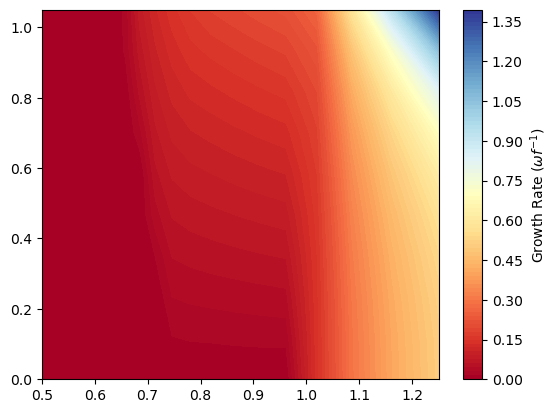

In [53]:
Sinf = N2**(0.5)*np.tan(theta)/f
gm_l_no_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*3*(1+(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_l_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*(3*(1+(N2**(0.5)*np.tan(theta)/f)**2)-4*0.5*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_no_d = (np.cos(theta)*(1+(1-0)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_d = (np.cos(theta)*(1+(1-0.5)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)

plt.contourf((sinf_arr**2/((1+sinf_arr**2)*(1-gms[0,:,:]))),np.array([delta_list]).T*np.ones(np.shape(max_gr)[1:-1]),np.abs(max_gr[0,:,:,0]),cmap="RdYlBu",alpha=1,levels=100) # ,norm=cl.LogNorm(vmin=0.001,vmax=10)
# plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",alpha=0.25)
# plt.scatter(Sinflist,gammalist,c=cl_growth_rates,alpha=1,cmap=cs.cmap,edgecolors="k",label="Simulation Growth Rates") # RdYlGn_r
# plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",alpha=0.25)
# plt.xlim([0,2.05])
# plt.ylim([gm_l_no_d[-2]-0.05,1.05])
plt.colorbar(label=r"Growth Rate ($\omega f^{-1}$)")

# plt.legend()
# plt.savefig("example_param_space.jpeg")


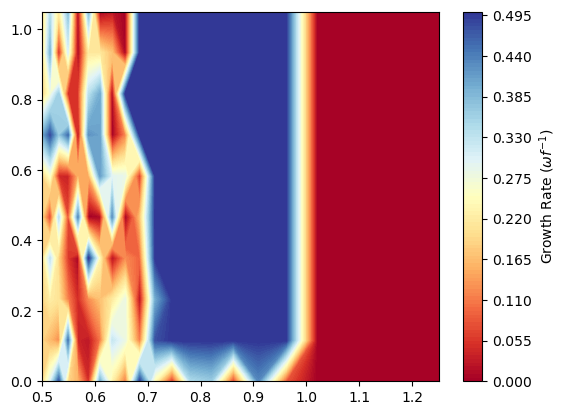

In [64]:
Sinf = N2**(0.5)*np.tan(theta)/f
gm_l_no_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*3*(1+(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_l_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*(3*(1+(N2**(0.5)*np.tan(theta)/f)**2)-4*0.5*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_no_d = (np.cos(theta)*(1+(1-0)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_d = (np.cos(theta)*(1+(1-0.5)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)

plt.contourf((sinf_arr**2/((1+sinf_arr**2)*(1-gms[0,:,:]))),np.array([delta_list]).T*np.ones(np.shape(max_fr)[1:-1]),np.abs(max_fr[0,:,:,0]),cmap="RdYlBu",alpha=1,levels=100) # ,norm=cl.LogNorm(vmin=0.001,vmax=10)
# plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",alpha=0.25)
# plt.scatter(Sinflist,gammalist,c=cl_growth_rates,alpha=1,cmap=cs.cmap,edgecolors="k",label="Simulation Growth Rates") # RdYlGn_r
# plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",alpha=0.25)
# plt.xlim([0,2.05])
# plt.ylim([gm_l_no_d[-2]-0.05,1.05])
plt.colorbar(label=r"Growth Rate ($\omega f^{-1}$)")

# plt.legend()
# plt.savefig("example_param_space.jpeg")


In [61]:
# (N2*np.tan(theta)**2/f**2)/((1+(N2*np.tan(theta)**2/f**2))*(1-gms))

ValueError: x and y must be the same size

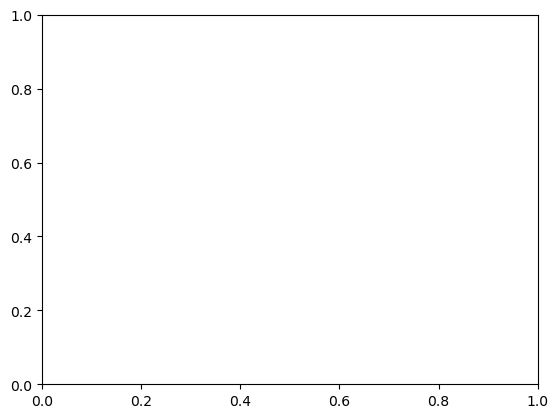

In [58]:
Sinf = N2**(0.5)*np.tan(theta_list)/f
gm_l_no_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*3*(1+(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_l_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*(3*(1+(N2**(0.5)*np.tan(theta)/f)**2)-4*0.5*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_no_d = (np.cos(theta)*(1+(1-0)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_d = (np.cos(theta)*(1+(1-0.5)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)

for i in range(10):
    plt.scatter(Sinf,gms[:,i],c=np.abs(max_gr[:,i,0]),cmap="RdYlBu")
# plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms[:,:],np.abs(max_gr[:,:,0]))

plt.colorbar(label=r"Growth Rate ($\omega f^{-1}$)",ticks=[0.025,0.05,0.075,0.1,0.125,0.15])
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")
plt.xlim([0,np.max(Sinf)])
plt.legend()
# plt.savefig("example_param_space.jpeg")


In [60]:
Sinf = N2**(0.5)*np.tan(theta_list)/f
mean_angle = []
for i in range(len(Sinf)):
    mean_angle_2 = []
    for j in range(np.shape(gms)[-1]):
        angle = -(N2*np.cos(theta_list[i])*(1-gms[i,j]/np.cos(theta_list[i])**2)/(N2*np.sin(theta_list[i]))) # *np.tan(theta[i])
        mean_angle_2.append(angle)
    mean_angle.append(mean_angle_2)
mean_angle = np.array(mean_angle)

IndexError: index 10 is out of bounds for axis 1 with size 10

In [ ]:
np.min(mean_angle**(-1))

In [ ]:
# for i in range(10):
#     plt.scatter(Sinf,gms[:,i],c=max_ms[:,i],cmap="RdYlBu")
plt.contourf(np.abs(np.array([Sinf]).T*np.ones(np.shape(gms))),gms[:,:],mean_angle,cmap="RdYlBu"
             ,alpha=1) # norm=cl.SymLogNorm(linthresh=1e-1)

plt.colorbar(label=r"Vertical Wave Number")
plt.plot(Sinf,(gm_l_no_d),c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,np.abs(gm_u_no_d),c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")
plt.xlim([0,2.025])
plt.ylim([gm_l_no_d[-2]-0.025,1.025])

# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

In [ ]:
import matplotlib.colors as cl

In [ ]:
Sinf = N2**(0.5)*np.tan(theta)/f
gm_l_no_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*3*(1+(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_l_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*(3*(1+(N2**(0.5)*np.tan(theta)/f)**2)-4*0.5*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_no_d = (np.cos(theta)*(1+(1-0)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_d = (np.cos(theta)*(1+(1-0.5)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
# np.array([np.tan(theta)]).T*np.ones(np.shape(gms))*
# for i in range(10):
#     plt.scatter(Sinf,gms[:,i],c=max_ms[:,i],cmap="RdYlBu")
plt.contourf(np.abs(np.array([Sinf]).T*np.ones(np.shape(gms))),gms[:,:],((max_ms[:,:])/mean_angle),cmap="RdYlBu"
             ,alpha=1)

plt.colorbar(label=r"Fraction of Mean Angle")
plt.plot(Sinf,(gm_l_no_d),c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=1)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,np.abs(gm_u_no_d),c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=1)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")
plt.xlim([0,2.025])
plt.ylim([gm_l_no_d[-2]-0.025,1.025])

# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")


In [ ]:
import matplotlib as pl

In [62]:
tau = 2*np.pi
dt = 100
t = np.linspace(0,tau+1/dt,dt)
Sinf = N2**(0.5)*np.tan(theta)/f
WSPRT = []
for j in range(len(Sinf)):
    WSPRT2 = []
#     WSPl = []
#     kel = []
    for i in range(np.shape(gms)[-1]):
        sol = sc.odeint(PSI_system,[0,1],t,args=(max_ms[j,i],theta[j],gms[j,i],Sinf[j]**2))
        lmbd = N2*np.tan(theta[j])*gms[j,i]/(f*np.cos(theta[j]))
        n = f*np.cos(theta[j])*(1+Sinf[j]**2)**(0.5)/lmbd
        beta = (1+Sinf[j]**2)**(0.5)
        delta = 0.5
        fstar = f*np.cos(theta[j])*beta
        w = ((m_t(t,max_ms[j,i],fstar))**2+1)**(-1)*sol[:,0]
        u = m_t(t,max_ms[j,i],fstar)*w*n
        v = -f*(gms[j,i]*Sinf[j]**2/np.sin(theta[j])-np.sin(theta[j])+max_ms[j,i]*np.cos(theta[j]))*sol[:,1]/(lmbd)
        b = -N2*np.sin(theta[j])*(max_ms[j,i]+(1-gms[j,i]/np.cos(theta[j])**2)/np.tan(theta[j]))*sol[:,1]/(N2*np.cos(theta[j])*(1-gms[j,i]/(np.cos(theta[j])**2)))
        ke = 0.5*(u**2+v**2+n**2*w**2)
        WSP = -u*w*delta*np.cos(t+np.pi/2)+v*w*(f*np.cos(theta[j])*delta/fstar*np.sin(t+np.pi/2))
        WSPRT2.append((sc.cumulative_trapezoid(WSP,t)[-1])/(ke[-1]-ke[0]))
    WSPRT.append(WSPRT2)
WSPRT = np.array(WSPRT)
norm = cl.Normalize(vmin = 0, vmax = 1.5)
sm = pl.cm.ScalarMappable(norm = norm, cmap = 'RdYlBu')
fig = plt.figure()
contour = plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms,WSPRT,norm=norm,cmap="RdYlBu")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
plt.xlim([0,np.max(Sinf)])
plt.ylim([0.05,1.05])
cbar_ax = fig.add_axes([0.9, 0.15, 0.05, 0.7])
cbar = plt.colorbar(sm,cax=cbar_ax,label=r"WSP Contribution")
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")


# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
tau = 2*np.pi
dt = 100
t = np.linspace(0,tau+1/dt,dt)
Sinf = N2**(0.5)*np.tan(theta)/f
WSPRTx = []
for j in range(len(Sinf)):
    WSPRTx2 = []
#     WSPl = []
#     kel = []
    for i in range(np.shape(gms)[-1]):
        sol = sc.odeint(PSI_system,[0,1],t,args=(max_ms[j,i],theta[j],gms[j,i],Sinf[j]**2))
        lmbd = N2*np.tan(theta[j])*gms[j,i]/(f*np.cos(theta[j]))
        n = f*np.cos(theta[j])*(1+Sinf[j]**2)**(0.5)/lmbd
        beta = (1+Sinf[j]**2)**(0.5)
        delta = 0.5
        fstar = f*np.cos(theta[j])*beta
        w = ((m_t(t,max_ms[j,i],fstar))**2+1)**(-1)*sol[:,0]
        u = m_t(t,max_ms[j,i],fstar)*w*n
        v = -f*(gms[j,i]*Sinf[j]**2/np.sin(theta[j])-np.sin(theta[j])+max_ms[j,i]*np.cos(theta[j]))*sol[:,1]/(lmbd)
        b = -N2*np.sin(theta[j])*(max_ms[j,i]+(1-gms[j,i]/np.cos(theta[j])**2)/np.tan(theta[j]))*sol[:,1]/(N2*np.cos(theta[j])*(1-gms[j,i]/(np.cos(theta[j])**2)))
        ke = 0.5*(u**2+v**2+n**2*w**2)
        WSPx = -u*w*delta*np.cos(t+np.pi/2)
        WSPRTx2.append((sc.cumulative_trapezoid(WSPx,t)[-1])/(ke[-1]-ke[0]))
    WSPRTx.append(WSPRTx2)
WSPRTx = np.array(WSPRTx)
plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms,WSPRTx,cmap="RdYlBu")
plt.colorbar(label=r"WSPx Contribution")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")

plt.xlim([0,np.max(Sinf)])
# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

In [ ]:
tau = 2*np.pi
dt = 100
t = np.linspace(0,tau+1/dt,dt)
Sinf = N2**(0.5)*np.tan(theta)/f
WSPRTy = []
for j in range(len(Sinf)):
    WSPRTy2 = []
    for i in range(np.shape(gms)[-1]):
        sol = sc.odeint(PSI_system,[0,1],t,args=(max_ms[j,i],theta[j],gms[j,i],Sinf[j]**2))
        lmbd = N2*np.tan(theta[j])*gms[j,i]/(f*np.cos(theta[j]))
        n = f*np.cos(theta[j])*(1+Sinf[j]**2)**(0.5)/lmbd
        beta = (1+Sinf[j]**2)**(0.5)
        delta = 0.5
        fstar = f*np.cos(theta[j])*beta
        w = ((m_t(t,max_ms[j,i],fstar))**2+1)**(-1)*sol[:,0]
        u = m_t(t,max_ms[j,i],fstar)*w*n
        v = -f*(gms[j,i]*Sinf[j]**2/np.sin(theta[j])-np.sin(theta[j])+max_ms[j,i]*np.cos(theta[j]))*sol[:,1]/(lmbd)
        b = -N2*np.sin(theta[j])*(max_ms[j,i]+(1-gms[j,i]/np.cos(theta[j])**2)/np.tan(theta[j]))*sol[:,1]/(N2*np.cos(theta[j])*(1-gms[j,i]/(np.cos(theta[j])**2)))
        ke = 0.5*(u**2+v**2+n**2*w**2)
        WSPy = v*w*(f*np.cos(theta[j])*delta/fstar*np.sin(t+np.pi/2))
        WSPRTy2.append((sc.cumulative_trapezoid(WSPy,t)[-1])/(ke[-1]-ke[0]))
    WSPRTy.append(WSPRTy2)
WSPRTy = np.array(WSPRTy)
plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms,WSPRTy,cmap="RdYlBu")
plt.colorbar(label=r"WSPy Contribution")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")

plt.xlim([0,np.max(Sinf)])
# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

In [ ]:
tau = 2*np.pi
dt = 100
t = np.linspace(0,tau+1/dt,dt)
Sinf = N2**(0.5)*np.tan(theta)/f
BFLUXRT = []
for j in range(len(Sinf)):
    BFLUXRT2 = []
    for i in range(np.shape(gms)[-1]):
        sol = sc.odeint(PSI_system,[0,1],t,args=(max_ms[j,i],theta[j],gms[j,i],Sinf[j]**2))
        lmbd = N2*np.tan(theta[j])*gms[j,i]/(f*np.cos(theta[j]))
        n = f*np.cos(theta[j])*(1+Sinf[j]**2)**(0.5)/lmbd
        beta = (1+Sinf[j]**2)**(0.5)
        alpha = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)*np.tan(theta[j])/(f*lmbd)
        Ri = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)/lmbd**2
        delta = 0.5
        fstar = f*np.cos(theta[j])*beta
        w = ((m_t(t,max_ms[j,i],fstar))**2+1)**(-1)*sol[:,0]
        u = m_t(t,max_ms[j,i],fstar)*w*n
        v = -f*(gms[j,i]*Sinf[j]**2/np.sin(theta[j])-np.sin(theta[j])+max_ms[j,i]*np.cos(theta[j]))*sol[:,1]/(lmbd)
        b = -N2*np.sin(theta[j])*(max_ms[j,i]+(1-gms[j,i]/np.cos(theta[j])**2)/np.tan(theta[j]))*sol[:,1]/(N2*np.cos(theta[j])*(1-gms[j,i]/(np.cos(theta[j])**2)))
        ke = 0.5*(u**2+v**2+n**2*w**2)
        BFLUX = alpha*beta**(-1)*u*b+w*b*Ri
        BFLUXRT2.append((sc.cumulative_trapezoid(BFLUX,t)[-1])/(ke[-1]-ke[0]))
    BFLUXRT.append(BFLUXRT2)
BFLUXRT = np.array(BFLUXRT)
plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms,BFLUXRT,cmap="RdYlBu")
plt.colorbar(label=r"BFLUX Contribution")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")

plt.xlim([0,np.max(Sinf)])
# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

In [ ]:
tau = 2*np.pi
dt = 100
t = np.linspace(0,tau+1/dt,dt)
Sinf = N2**(0.5)*np.tan(theta)/f
BFLUXxRT = []
for j in range(len(Sinf)):
    BFLUXxRT2 = []
    for i in range(np.shape(gms)[-1]):
        sol = sc.odeint(PSI_system,[0,1],t,args=(max_ms[j,i],theta[j],gms[j,i],Sinf[j]**2))
        lmbd = N2*np.tan(theta[j])*gms[j,i]/(f*np.cos(theta[j]))
        n = f*np.cos(theta[j])*(1+Sinf[j]**2)**(0.5)/lmbd
        beta = (1+Sinf[j]**2)**(0.5)
        alpha = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)*np.tan(theta[j])/(f*lmbd)
        Ri = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)/lmbd**2
        delta = 0.5
        fstar = f*np.cos(theta[j])*beta
        w = ((m_t(t,max_ms[j,i],fstar))**2+1)**(-1)*sol[:,0]
        u = m_t(t,max_ms[j,i],fstar)*w*n
        v = -f*(gms[j,i]*Sinf[j]**2/np.sin(theta[j])-np.sin(theta[j])+max_ms[j,i]*np.cos(theta[j]))*sol[:,1]/(lmbd)
        b = -N2*np.sin(theta[j])*(max_ms[j,i]+(1-gms[j,i]/np.cos(theta[j])**2)/np.tan(theta[j]))*sol[:,1]/(N2*np.cos(theta[j])*(1-gms[j,i]/(np.cos(theta[j])**2)))
        ke = 0.5*(u**2+v**2+n**2*w**2)
        BFLUXx = alpha*beta**(-1)*u*b
        BFLUXxRT2.append((sc.cumulative_trapezoid(BFLUXx,t)[-1])/(ke[-1]-ke[0]))
    BFLUXxRT.append(BFLUXxRT2)
BFLUXxRT = np.array(BFLUXxRT)
plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms,BFLUXxRT,cmap="RdYlBu")
plt.colorbar(label=r"BFLUXx Contribution")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")

plt.xlim([0,np.max(Sinf)])
# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

In [ ]:
tau = 2*np.pi
dt = 100
t = np.linspace(0,tau+1/dt,dt)
Sinf = N2**(0.5)*np.tan(theta)/f
BFLUXzRT = []
for j in range(len(Sinf)):
    BFLUXzRT2 = []
    for i in range(np.shape(gms)[-1]):
        sol = sc.odeint(PSI_system,[0,1],t,args=(max_ms[j,i],theta[j],gms[j,i],Sinf[j]**2))
        lmbd = N2*np.tan(theta[j])*gms[j,i]/(f*np.cos(theta[j]))
        n = f*np.cos(theta[j])*(1+Sinf[j]**2)**(0.5)/lmbd
        beta = (1+Sinf[j]**2)**(0.5)
        alpha = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)*np.tan(theta[j])/(f*lmbd)
        Ri = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)/lmbd**2
        delta = 0.5
        fstar = f*np.cos(theta[j])*beta
        w = ((m_t(t,max_ms[j,i],fstar))**2+1)**(-1)*sol[:,0]
        u = m_t(t,max_ms[j,i],fstar)*w*n
        v = -f*(gms[j,i]*Sinf[j]**2/np.sin(theta[j])-np.sin(theta[j])+max_ms[j,i]*np.cos(theta[j]))*sol[:,1]/(lmbd)
        b = -N2*np.sin(theta[j])*(max_ms[j,i]+(1-gms[j,i]/np.cos(theta[j])**2)/np.tan(theta[j]))*sol[:,1]/(N2*np.cos(theta[j])*(1-gms[j,i]/(np.cos(theta[j])**2)))
        ke = 0.5*(u**2+v**2+n**2*w**2)
        BFLUXz = w*b*Ri
        BFLUXzRT2.append((sc.cumulative_trapezoid(BFLUXz,t)[-1])/(ke[-1]-ke[0]))
    BFLUXzRT.append(BFLUXzRT2)
BFLUXzRT = np.array(BFLUXzRT)
plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms,BFLUXzRT,cmap="RdYlBu")
plt.colorbar(label=r"BFLUXz Contribution")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")

plt.xlim([0,np.max(Sinf)])
# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

In [ ]:
tau = 2*np.pi
dt = 100
t = np.linspace(0,tau+1/dt,dt)
Sinf = N2**(0.5)*np.tan(theta)/f
GSPRT = []
for j in range(len(Sinf)):
    GSPRT2 = []
    for i in range(np.shape(gms)[-1]):
        sol = sc.odeint(PSI_system,[0,1],t,args=(max_ms[j,i],theta[j],gms[j,i],Sinf[j]**2))
        lmbd = N2*np.tan(theta[j])*gms[j,i]/(f*np.cos(theta[j]))
        n = f*np.cos(theta[j])*(1+Sinf[j]**2)**(0.5)/lmbd
        beta = (1+Sinf[j]**2)**(0.5)
        alpha = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)*np.tan(theta[j])/(f*lmbd)
        Ri = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)/lmbd**2
        delta = 0.5
        fstar = f*np.cos(theta[j])*beta
        w = ((m_t(t,max_ms[j,i],fstar))**2+1)**(-1)*sol[:,0]
        u = m_t(t,max_ms[j,i],fstar)*w*n
        v = -f*(gms[j,i]*Sinf[j]**2/np.sin(theta[j])-np.sin(theta[j])+max_ms[j,i]*np.cos(theta[j]))*sol[:,1]/(lmbd)
        b = -N2*np.sin(theta[j])*(max_ms[j,i]+(1-gms[j,i]/np.cos(theta[j])**2)/np.tan(theta[j]))*sol[:,1]/(N2*np.cos(theta[j])*(1-gms[j,i]/(np.cos(theta[j])**2)))
        ke = 0.5*(u**2+v**2+n**2*w**2)
        GSP = -v*w
        GSPRT2.append((sc.cumulative_trapezoid(GSP,t)[-1])/((ke[-1]-ke[0])))
    GSPRT.append(GSPRT2)
GSPRT = np.array(GSPRT)
plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms,GSPRT,cmap="RdYlBu")

plt.colorbar(label=r"GSP Contribution")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")

plt.xlim([0,np.max(Sinf)])
# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

In [ ]:
tau = 2*np.pi
dt = 100
t = np.linspace(0,tau+1/dt,dt)
Sinf = N2**(0.5)*np.tan(theta)/f
BFLUXGSPRT = []
for j in range(len(Sinf)):
    BFLUXGSPRT2 = []
    for i in range(np.shape(gms)[-1]):
        sol = sc.odeint(PSI_system,[0,1],t,args=(max_ms[j,i],theta[j],gms[j,i],Sinf[j]**2))
        lmbd = N2*np.tan(theta[j])*gms[j,i]/(f*np.cos(theta[j]))
        n = f*np.cos(theta[j])*(1+Sinf[j]**2)**(0.5)/lmbd
        beta = (1+Sinf[j]**2)**(0.5)
        alpha = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)*np.tan(theta[j])/(f*lmbd)
        Ri = N2*np.cos(theta[j])*(1-gms[j,i]/np.cos(theta[j])**2)/lmbd**2
        delta = 0.5
        fstar = f*np.cos(theta[j])*beta
        w = ((m_t(t,max_ms[j,i],fstar))**2+1)**(-1)*sol[:,0]
        u = m_t(t,max_ms[j,i],fstar)*w*n
        v = -f*(gms[j,i]*Sinf[j]**2/np.sin(theta[j])-np.sin(theta[j])+max_ms[j,i]*np.cos(theta[j]))*sol[:,1]/(lmbd)
        b = -N2*np.sin(theta[j])*(max_ms[j,i]+(1-gms[j,i]/np.cos(theta[j])**2)/np.tan(theta[j]))*sol[:,1]/(N2*np.cos(theta[j])*(1-gms[j,i]/(np.cos(theta[j])**2)))
        ke = 0.5*(u**2+v**2+n**2*w**2)
        BFLUXGSP = alpha*beta**(-1)*u*b+w*b*Ri-v*w
        BFLUXGSPRT2.append((sc.cumulative_trapezoid(BFLUX,t)[-1])/(ke[-1]-ke[0]))
    BFLUXGSPRT.append(BFLUXGSPRT2)
BFLUXGSPRT = np.array(BFLUXGSPRT)
plt.contourf(np.array([Sinf]).T*np.ones(np.shape(gms)),gms,BFLUXGSPRT,cmap="RdYlBu")
plt.colorbar(label=r"GSP+BFLUX Contribution")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--",label=r"$\gamma^*_l$",alpha=0.5)
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--",label=r"$\gamma^*_u$",alpha=0.5)
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")

plt.xlim([0,np.max(Sinf)])
# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")

In [ ]:
Sinf = N2**(0.5)*np.tan(theta)/f
gm_l_no_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*3*(1+(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_l_d =(3-(N2**(0.5)*np.tan(theta)/f)**2)*(np.cos(theta)*(3*(1+(N2**(0.5)*np.tan(theta)/f)**2)-4*0.5*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_no_d = (np.cos(theta)*(1+(1-0)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)
gm_u_d = (np.cos(theta)*(1+(1-0.5)*(N2**(0.5)*np.tan(theta)/f)**2))**(-1)

for i in range(10):
    plt.scatter(Sinf,gms[:,i],c=np.abs(max_ms[:,i]),cmap="RdYlBu")
plt.colorbar(label=r"Normalized Vertical Wave Number")
plt.plot(Sinf,gm_l_no_d,c="k",linestyle="--")
# plt.plot(Sinf,gm_l_d,c="k",label=r"$\delta=0.5,\, \gamma^*_l$")
plt.plot(Sinf,gm_u_no_d,c="k",linestyle="--")
# plt.plot(Sinf,gm_u_d,c="k",label=r"$\delta=0.5,\, \gamma^*_u$")
# plt.hlines(0,0,2,color="k")

plt.xlim([0,np.max(Sinf)])
# plt.legend()
plt.savefig("example_param_space_wave_mode.jpeg")


In [ ]:
for i in range(10):
    plt.scatter(Sinf,gms[:,i],c=np.log10(0.1*np.cos(theta)/(10**(-5/2)*Sinf*gms[:,i])),cmap="RdYlBu")
plt.colorbar()

In [ ]:
# # plt.contourf(Sinf,np.linspace(-0.2,1,30),np.abs(max_gr[:,:]),levels=1000,cmap="RdYlBu")
# plt.colorbar()
# plt.plot(Sinf,gm_l_no_d,c="c")
# plt.plot(Sinf,gm_l_d,c="r")
# plt.plot(Sinf,gm_u_no_d,c="c")
# plt.plot(Sinf,gm_u_d,c="r")

In [ ]:
plt.contourf(Sinf,np.linspace(-0.2,1,30),(max_fr[:,:,0]).T,levels=1000,cmap="Accent")
plt.colorbar()
plt.plot(Sinf,gm_l_no_d,c="c")
plt.plot(Sinf,gm_l_d,c="r")
plt.plot(Sinf,gm_u_no_d,c="c")
plt.plot(Sinf,gm_u_d,c="r")

In [ ]:
for i in range(10):
    plt.scatter(Sinf,gms[:,i],c=max_fr[:,i,0]/(1+Sinf**2)**(0.5),vmin=0,vmax=1)
plt.colorbar()
plt.plot(Sinf,gm_l_no_d,c="k")
plt.plot(Sinf,gm_l_d,c="r")
plt.plot(Sinf,gm_u_no_d,c="k")
plt.plot(Sinf,gm_u_d,c="r")
plt.hlines(0,0,2)

In [ ]:
plt.plot(N2**(0.5)*np.tan(theta)/f,max_gr[:,0])
plt.plot(N2**(0.5)*np.tan(theta)/f,max_gr[:,1])
plt.vlines(np.sqrt(3),-0.15,0.15)

In [ ]:
plt.plot(N2**(0.5)*np.tan(theta)/f,max_ms[:])
# plt.plot(N2**(0.5)*np.tan(theta)/f,max_ms[:,1])
# plt.vlines(np.sqrt(3),-0.15,0.15)
# plt.xscale("log")

In [ ]:
plt.plot(N2**(0.5)*np.tan(theta)/f,max_fr[:,0]/(N2*np.tan(theta)**2/f**2+1)**(0.5))
plt.plot(N2**(0.5)*np.tan(theta)/f,max_fr[:,1]/(N2*np.tan(theta)**2/f**2+1)**(0.5))
# plt.vlines(np.sqrt(3),-0.15,0.15)
# plt.yscale("symlog",linthresh=1e-3)

In [ ]:
plt.scatter(m,growth_rates[:,0],marker=".",color="k")
plt.scatter(m,growth_rates[:,1],marker=".",color="k")
plt.xlabel("Vertical Wave Mode")
plt.ylabel("Growth Rate")
# plt.yscale("symlog",linthresh=1e-4)
# plt.xscale("symlog",linthresh=1e-2)

In [ ]:
plt.scatter(m,frequencies[:,0]/beta,marker=".",color="k")
plt.scatter(m,frequencies[:,1]/beta,marker=".",color="k")
# plt.hlines(0.5,0,3,color="k")

In [ ]:
gr = growth_rates[np.argmax(np.abs(growth_rates[:,0])),:]
fr = frequencies[np.argmax(np.abs(growth_rates[:,0])),:]
m_max = m[np.argmax(np.abs(growth_rates[:,0]))]
gr